In [1]:
import pandas as pd
import numpy as np
import random as r 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Generate song names

song_names = ['Miss Me', 'Over','All Me', 'God\'s Plan', 'Nonstop', 'No Tellin\'', 
              'Free Smoke', 'Know Yourself', 'The Language', 'Energy', 'Worst Behavior', 
              'Too Much', 'Wu-Tang Forever', 'Buried Alive Interlude', 'Pound Cake / Paris Morton Music 2', 
              'Marvins Room', 'Practice', '305 To My City', 'Trophies', 'Mob Ties', 
              'Knife Talk (with 21 Savage ft. Project Pat)', 
              'Way 2 Sexy (with Future & Young Thug)', 'No Friends In The Industry', 
              'Fair Trade (with Travis Scott)', 
              'N 2 Deep', 'Love All (with JAY-Z)', 'Champagne Poetry', 
              'Papi’s Home', '7am On Bridle Path', 'Cameras/Good ones go interlude'
              'Childs Play', 'Teenage Fever', 'Peak','Over My Dead Body', 'Shot For Me', 'Headlines', 
              'Crew Love', 'Take Care', 'Marvins Room', 'Buried Alive Interlude', 'Under Ground Kings', 
              'Make Me Proud', 'Lord Knows', 'Tuscan Leather', 'Furthest Thing', 'Hold On, Were Going Home', 
              'Too Much', 'Own It', 'Keep the Family Close', 'Fake Love','9', 'Hype', 'Still Here', 'Controlla','Legend',
             'Preach', 'Uptown', 'Best Ive Ever Had', 'Successful', '5AM in Toronto', 'Trust Issues',
              '0 To 100/ The Catch Up', 'The Motto','Cant Take a Joke',
             'Blem', 'Company','Jaded', 'Connect', 'Come Thru', 'Shut It Down', 'Light Up']

# Generate song lengths 
# These are not accurate  
# Work smarter, not harder
song_lengths = [round(r.uniform(190,440)) for _ in range(len(song_names))]   

# Corresponding albums
albums = ['Thank Me Later','Thank Me Later', 'Nothing Was The Same (Deluxe)', 'Scorpion', 'Scorpion', 
          'If Youre Reading This Its Too Late', 'More Life', 
          'If Youre Reading This Its Too Late', 'Nothing Was The Same (Deluxe)', 
          'If Youre Reading This Its Too Late', 'Nothing Was The Same (Deluxe)', 
          'Nothing Was The Same (Deluxe)', 'Nothing Was The Same (Deluxe)', 'Take Care (Deluxe)', 
          'Nothing Was The Same (Deluxe)', 'Take Care (Deluxe)', 'Take Care (Deluxe)', 
          'Nothing Was The Same (Deluxe)', 'Rise Of An Empire (Deluxe Edition)', 'Scorpion', 
          'Certified Lover Boy', 'Certified Lover Boy', 'Certified Lover Boy', 'Certified Lover Boy', 
          'Certified Lover Boy', 'Certified Lover Boy', 'Certified Lover Boy', 'Certified Lover Boy', 
          'Certified Lover Boy', 'Take Care (Deluxe)','Views', 'More Life', 'Scorpion','Take Care (Deluxe)', 
          'Take Care (Deluxe)', 'Take Care (Deluxe)', 'Take Care (Deluxe)', 'Take Care (Deluxe)', 
          'Take Care (Deluxe)', 'Take Care (Deluxe)', 'Take Care (Deluxe)', 
          'Take Care (Deluxe)', 'Take Care (Deluxe)', 'Nothing Was The Same (Deluxe)', 
          'Nothing Was The Same (Deluxe)', 'Nothing Was The Same (Deluxe)', 
          'Nothing Was The Same (Deluxe)', 'Nothing Was The Same (Deluxe)', 
          'Views', 'Views', 'Views', 'Views', 'Views','If Youre Reading This Its Too Late',
         'If Youre Reading This Its Too Late','So Far Gone EP', 'So Far Gone EP', 'So Far Gone EP', 
         'Care Package', 'Care Package','0 To 100/ The Catch Up', 'Take Care (Deluxe)', 'Scorpion', 'More Life',
        'If Youre Reading This Its Too Late','Scorpion', 'Nothing Was The Same (Deluxe)','Nothing Was The Same (Deluxe)',
         'Thank Me Later','Thank Me Later']

# Corresponding release year for albums

years = [2010, 2010, 2013, 2018, '2018', '2015', '2017', '2015', '2013', '2015', 
         '2013', '2015', '2016', '2018', '2018', '2016', '2017', '2015', '2009', 
         '2018', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', 
         '2021','2016', '2017', '2018',2011, 2011, 2011, 2011, 2011, 2011, 2011, 
         2011, 2011, 2011, 2013, 2013, 2013, 2013, 2013, 2016, 2016, 2016, 2016, 2016,
        2015, 2015, 2009, 2009, 2009, 2019, 2019, 2013, 2011, 2018, 2017, 2015, 2018, 2013, 2013,
        2010,2010,2010]


In [3]:
# Convert all years to int for comparison 
years = [int(year) for year in years]

hit_list = pd.DataFrame(albums)
hit_list['Song-Name'] = song_names
hit_list['Song-Length-In-Seconds'] = song_lengths
hit_list['Release-Year'] = years
hit_list

,0,Song-Name,Song-Length-In-Seconds,Release-Year
0,Thank Me Later,Miss Me,403,2010
1,Thank Me Later,Over,193,2010
2,Nothing Was The Same (Deluxe),All Me,238,2013
3,Scorpion,God's Plan,338,2018
4,Scorpion,Nonstop,315,2018
...,...,...,...,...
65,Scorpion,Jaded,310,2013
66,Nothing Was The Same (Deluxe),Connect,365,2013
67,Nothing Was The Same (Deluxe),Come Thru,421,2010
68,Thank Me Later,Shut It Down,234,2010


In [4]:
# Making sure all Take Care's say 2011
tc = hit_list[[0,'Release-Year']]
tc = tc[tc['Release-Year']!= 2011]
tc = tc[tc[0]== 'Take Care (Deluxe)']

# Set Release Year to 2011 for filtered rows
tc['Release-Year'] = 2011   

# Update hit_list
hit_list.loc[tc.index, 'Release-Year'] = 2011

# Making sure all NWTS's say 2013
nwts = hit_list[[0,'Release-Year']]
nwts = nwts[nwts['Release-Year']!= 2013]
nwts = nwts[nwts[0]== 'Nothing Was The Same (Deluxe)']

# Set Release Year to 2011 for filtered rows
nwts['Release-Year'] = 2013  

# Update hit_list
hit_list.loc[tc.index, 'Release-Year'] = 2013

#All years should be correct
hit_list

,0,Song-Name,Song-Length-In-Seconds,Release-Year
0,Thank Me Later,Miss Me,403,2010
1,Thank Me Later,Over,193,2010
2,Nothing Was The Same (Deluxe),All Me,238,2013
3,Scorpion,God's Plan,338,2018
4,Scorpion,Nonstop,315,2018
...,...,...,...,...
65,Scorpion,Jaded,310,2013
66,Nothing Was The Same (Deluxe),Connect,365,2013
67,Nothing Was The Same (Deluxe),Come Thru,421,2010
68,Thank Me Later,Shut It Down,234,2010


In [5]:
# Rename 0 column to 'Albums'
hit_list = hit_list.rename(columns={0: 'Albums'})

# Setting index to start at 1 to make more sense
hit_list.index = range(1, len(hit_list)+1)

hit_list

#Adding a Listen-Count column
#to determine how many times the
#songs were played from start to finish

# Create NaN column of same length as the DataFrame
listen_count = [np.nan] * len(hit_list)

# Insert column
hit_list.insert(loc=4, column='Listen-Count', value=listen_count)

hit_list

,Albums,Song-Name,Song-Length-In-Seconds,Release-Year,Listen-Count
1,Thank Me Later,Miss Me,403,2010,NaN
2,Thank Me Later,Over,193,2010,NaN
3,Nothing Was The Same (Deluxe),All Me,238,2013,NaN
4,Scorpion,God's Plan,338,2018,NaN
5,Scorpion,Nonstop,315,2018,NaN
...,...,...,...,...,...
66,Scorpion,Jaded,310,2013,NaN
67,Nothing Was The Same (Deluxe),Connect,365,2013,NaN
68,Nothing Was The Same (Deluxe),Come Thru,421,2010,NaN
69,Thank Me Later,Shut It Down,234,2010,NaN


In [6]:
# Changing NaN values to random
# numbers to represent play counts

# Populate listen count with a list
# that choose random numbers between 100 and 200
hit_list['Listen-Count'] = [round(r.randint(100, 200)) for _ in range(len(hit_list))]

# these are condotionals that 
# skew the numbers to make things interesting
mask = hit_list['Release-Year'] < 2013  
hit_list.loc[mask, 'Listen-Count'] *=4

mask1 = hit_list['Release-Year'] < 2016  
hit_list.loc[mask1, 'Listen-Count'] *= 3


mask2 = hit_list['Release-Year'] < 2018  
hit_list.loc[mask2, 'Listen-Count'] *= 2

hit_list

,Albums,Song-Name,Song-Length-In-Seconds,Release-Year,Listen-Count
1,Thank Me Later,Miss Me,403,2010,2712
2,Thank Me Later,Over,193,2010,3504
3,Nothing Was The Same (Deluxe),All Me,238,2013,798
4,Scorpion,God's Plan,338,2018,115
5,Scorpion,Nonstop,315,2018,159
...,...,...,...,...,...
66,Scorpion,Jaded,310,2013,732
67,Nothing Was The Same (Deluxe),Connect,365,2013,1032
68,Nothing Was The Same (Deluxe),Come Thru,421,2010,4080
69,Thank Me Later,Shut It Down,234,2010,4344


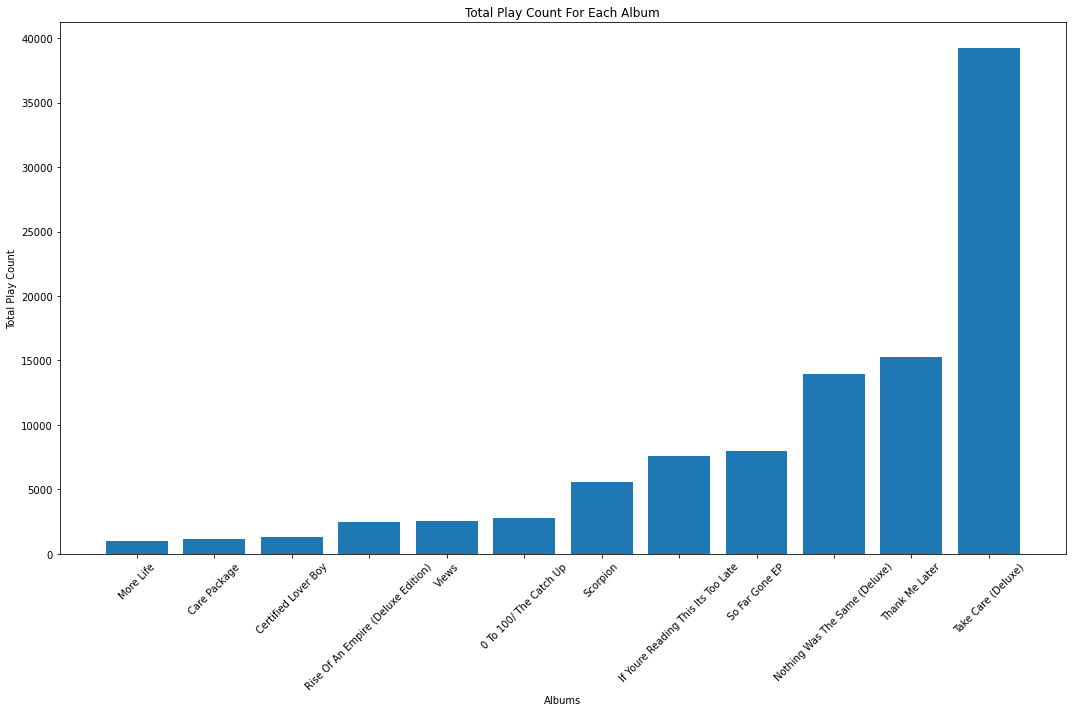

In [7]:
# Filter hit_list by albums and Listen count 
albums_by_plays = hit_list[['Albums','Listen-Count']]

# Visuallize to see which albums are played the most

# Group total_by_payment by payment options

grouped = albums_by_plays.groupby('Albums')['Listen-Count'].sum().reset_index()

# Create a bar chart
grouped = grouped.sort_values('Listen-Count')
plt.figure(figsize=(15, 10))
plt.bar(grouped['Albums'], grouped['Listen-Count'])
plt.xlabel('Albums')
plt.ylabel('Total Play Count')
plt.title('Total Play Count For Each Album')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# This code will create  a bar chart showing 

# Total Play Count For Each Album

# It looks like the results are

# skewed towards the right

# Big surprise..not really bc i made the code that way :/

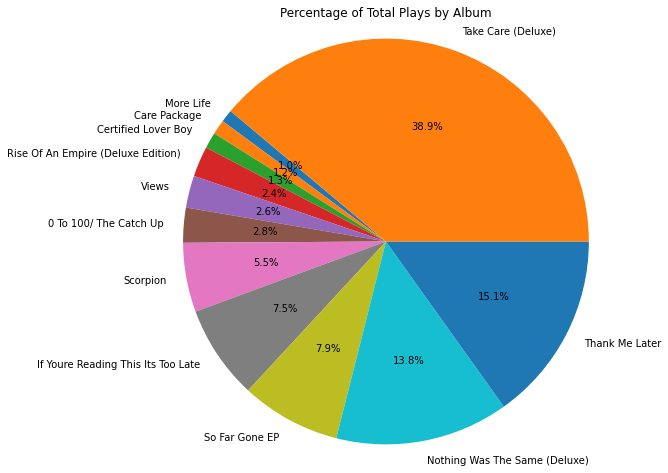

In [8]:
# Calculate the total playd for each album
total_plays = grouped['Listen-Count'].sum()

# Calculate the percentage of total sales for each payment method
grouped['Percentage'] = (grouped['Listen-Count'] / total_plays) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped['Percentage'], labels=grouped['Albums'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Total Plays by Album')
plt.show()
# This code will create a pie chart showing the percentage 
# distribution of total plays among different album


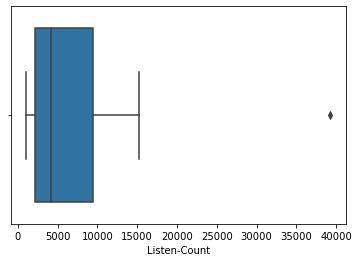

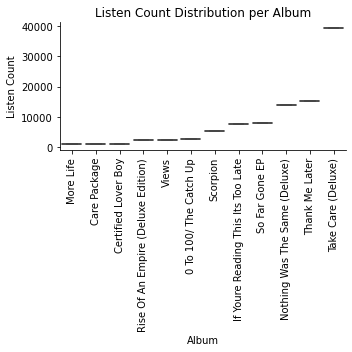

In [9]:
# Create boxplot 
sns.boxplot(x='Listen-Count', data=grouped)

# Create catplot
sns.catplot(x='Albums', y='Listen-Count', data=grouped, kind='box')

# Decorations  
plt.xlabel('Album')
plt.ylabel('Listen Count')
plt.title('Listen Count Distribution per Album')
plt.xticks(rotation=90)
plt.tight_layout()

# Display plot
plt.show()



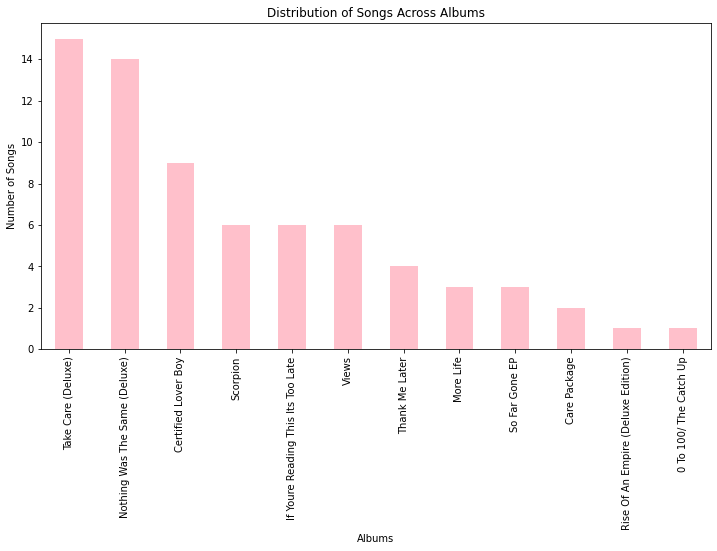

In [10]:
# Group the data by album and count the number of songs in each album
album_counts = hit_list['Albums'].value_counts()

# Create a bar chart for album distribution
plt.figure(figsize=(12, 6))
album_counts.plot(kind='bar', color='pink')
plt.title('Distribution of Songs Across Albums')
plt.xlabel('Albums')
plt.ylabel('Number of Songs')
plt.xticks(rotation=90)
plt.show()


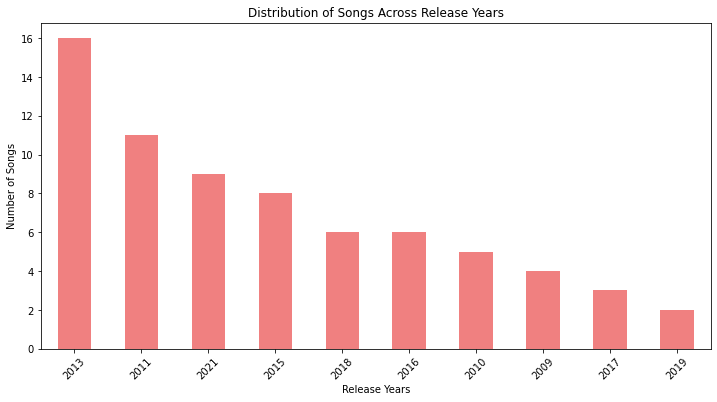

In [11]:
# Group the data by release year and count the number of songs in each year
year_counts = hit_list['Release-Year'].value_counts()

# Create a bar chart for release year distribution
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Songs Across Release Years')
plt.xlabel('Release Years')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Hot encoding to change the categorical 
# album variable to a numerial representative
# This makes hit_list wider by adding an
# Additional cols with 1s and 0s to represent
#if the song is a member of that album
# Perform one-hot encoding on the "Albums" column
hit_list_encoded = pd.get_dummies(hit_list, columns=['Albums'])
hit_list_encoded

,Song-Name,Song-Length-In-Seconds,Release-Year,Listen-Count,Albums_0 To 100/ The Catch Up,Albums_Care Package,Albums_Certified Lover Boy,Albums_If Youre Reading This Its Too Late,Albums_More Life,Albums_Nothing Was The Same (Deluxe),Albums_Rise Of An Empire (Deluxe Edition),Albums_Scorpion,Albums_So Far Gone EP,Albums_Take Care (Deluxe),Albums_Thank Me Later,Albums_Views
1,Miss Me,403,2010,2712,0,0,0,0,0,0,0,0,0,0,1,0
2,Over,193,2010,3504,0,0,0,0,0,0,0,0,0,0,1,0
3,All Me,238,2013,798,0,0,0,0,0,1,0,0,0,0,0,0
4,God's Plan,338,2018,115,0,0,0,0,0,0,0,1,0,0,0,0
5,Nonstop,315,2018,159,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Jaded,310,2013,732,0,0,0,0,0,0,0,1,0,0,0,0
67,Connect,365,2013,1032,0,0,0,0,0,1,0,0,0,0,0,0
68,Come Thru,421,2010,4080,0,0,0,0,0,1,0,0,0,0,0,0
69,Shut It Down,234,2010,4344,0,0,0,0,0,0,0,0,0,0,1,0


In [13]:
## Hypothesis testing

HA = 'We reject the null hypothesis and assume that'
HO = 'We fail to reject the null hypothesis and assume that'

# Create two subsets: songs released before and after 2015
before_2015 = hit_list[hit_list['Release-Year'] < 2015]
after_2015 = hit_list[hit_list['Release-Year'] >= 2015]


# Perform the t-test
t_stat, p_value = stats.ttest_ind(before_2015['Listen-Count'], after_2015['Listen-Count'])

# Print the results
if p_value < 0.03:
    print(HA,"there are more plays for songs released after 2015.")
else:
    print(HO,"there are NOT more plays for songs released after 2015.")
print("t-statistic:", round(t_stat,2))
print("p-value:", p_value)





# Perform ANOVA If you have more than two groups 
# (e.g., comparing listen counts across multiple years),
# to test for overall differences in means
# The f_stat value is the F-statistic, 
# which measures the ratio of the variance between groups to the variance within groups

f_stat, p_value = stats.f_oneway(before_2015['Listen-Count'], after_2015['Listen-Count'])

# Print the results
if p_value < 0.03:
    print(HA,"there are more plays for songs released after 2015.")
else:
    print(HO,"there are NOT more plays for songs released after 2015.")
print("f-statistic:", round(f_stat,2))
print("p-value:", p_value)



We reject the null hypothesis and assume that there are more plays for songs released after 2015.
t-statistic: 8.2
p-value: 9.37162351146526e-12
We reject the null hypothesis and assume that there are more plays for songs released after 2015.
f-statistic: 67.29
p-value: 9.371623511465319e-12


In [14]:
# Changing song_name col in hit_list_endcoded

# to be unique numerical values for regression



hit_list_encoded = pd.get_dummies(hit_list_encoded, columns=['Song-Name'], prefix='Song')

'''unique_song_names = hit_list_encoded['Song-Name'].unique()
for song_name in unique_song_names:
    hit_list_encoded[f'Song_{song_name}'] = (hit_list_encoded['Song-Name'] == song_name).astype(int)'''

# the downside is it doesn't look like 
# all the songs are printed as columns
# but a win is a win i guess
# hopefully i'll figure it out
hit_list_encoded

,Song-Length-In-Seconds,Release-Year,Listen-Count,Albums_0 To 100/ The Catch Up,Albums_Care Package,Albums_Certified Lover Boy,Albums_If Youre Reading This Its Too Late,Albums_More Life,Albums_Nothing Was The Same (Deluxe),Albums_Rise Of An Empire (Deluxe Edition),...,Song_The Motto,Song_Too Much,Song_Trophies,Song_Trust Issues,Song_Tuscan Leather,Song_Under Ground Kings,Song_Uptown,Song_Way 2 Sexy (with Future & Young Thug),Song_Worst Behavior,Song_Wu-Tang Forever
1,403,2010,2712,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,193,2010,3504,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,238,2013,798,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,338,2018,115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,315,2018,159,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,310,2013,732,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,365,2013,1032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
68,421,2010,4080,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
69,234,2010,4344,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# predict listen-count on hit_list 
# based on other features using regression
# i'll be using the hit_list_encoded set

# Assuming hit_list_encoded contains the data
# X contains the features (excluding Listen-Count)
X = hit_list_encoded.drop(columns=['Listen-Count'])
y = hit_list_encoded['Listen-Count']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train,y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)



Mean Absolute Error (MAE): 2426.2509392085485
Mean Squared Error (MSE): 9475283.318017647
Root Mean Squared Error (RMSE): 3078.194814825346
R-squared (R2): -2.6426443355129208


In [16]:
# Adding another column for streaming platform
# platform = ['Apple Music', 'Spotify', 'Tidal','Amazon Music', 'Pandora']


# Populate spotfiy count with a list
# that choose random numbers between 10M and 100M
hit_list['Spotify'] = [round(r.randint(10000000, 100000000)) for _ in range(len(hit_list))]

# Populate AM count with a list
# that choose random numbers between 8M and 90M
hit_list['Apple-Music'] = [round(r.randint(8000000, 90000000)) for _ in range(len(hit_list))]

# Populate Tidal count with a list
# that choose random numbers between 6M and 80M
hit_list['Tidal'] = [round(r.randint(6000000, 80000000)) for _ in range(len(hit_list))]

# Populate Amazon Music count with a list
# that choose random numbers between 4M and 60M
hit_list['Amazon-Music'] = [round(r.randint(4000000, 60000000)) for _ in range(len(hit_list))]

# Populate Pandora count with a list
# that choose random numbers between 3M and 30M
hit_list['Pandora'] = [round(r.randint(3000000, 30000000)) for _ in range(len(hit_list))]

# Copying hit_list and dropping Listen-Counts
hit_list1 = hit_list.copy()  # Create a copy of hit_list
hit_list1.drop(columns=['Listen-Count'], inplace=True)  # Drop the column from the copy
hit_list1

,Albums,Song-Name,Song-Length-In-Seconds,Release-Year,Spotify,Apple-Music,Tidal,Amazon-Music,Pandora
1,Thank Me Later,Miss Me,403,2010,46480446,73418714,40366775,49294336,10613679
2,Thank Me Later,Over,193,2010,95857373,23006148,79664014,53664342,20882398
3,Nothing Was The Same (Deluxe),All Me,238,2013,82197221,39859649,17927021,29843942,8755002
4,Scorpion,God's Plan,338,2018,31476782,11445160,76693529,31868445,9775267
5,Scorpion,Nonstop,315,2018,78223924,31403177,43263807,59019720,13025682
...,...,...,...,...,...,...,...,...,...
66,Scorpion,Jaded,310,2013,20437206,48863582,25510880,29213770,8968387
67,Nothing Was The Same (Deluxe),Connect,365,2013,99311391,83731816,23845169,41773092,27040936
68,Nothing Was The Same (Deluxe),Come Thru,421,2010,82642121,14773663,55676884,43864875,24501208
69,Thank Me Later,Shut It Down,234,2010,35167280,34479831,58380971,28546166,7364054


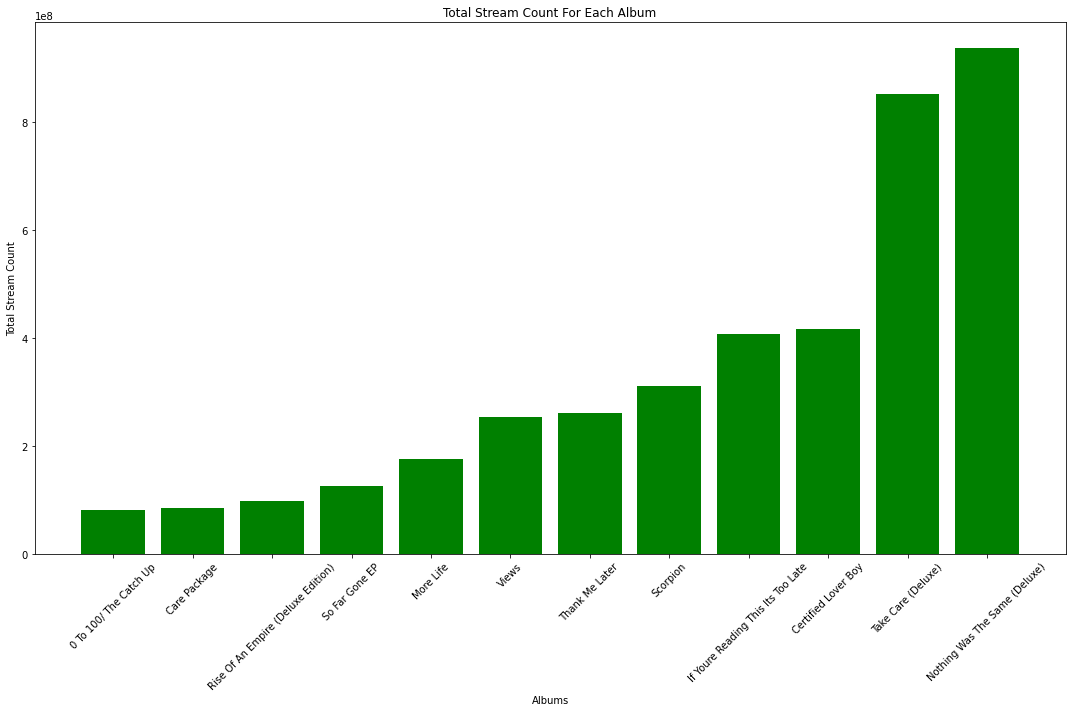

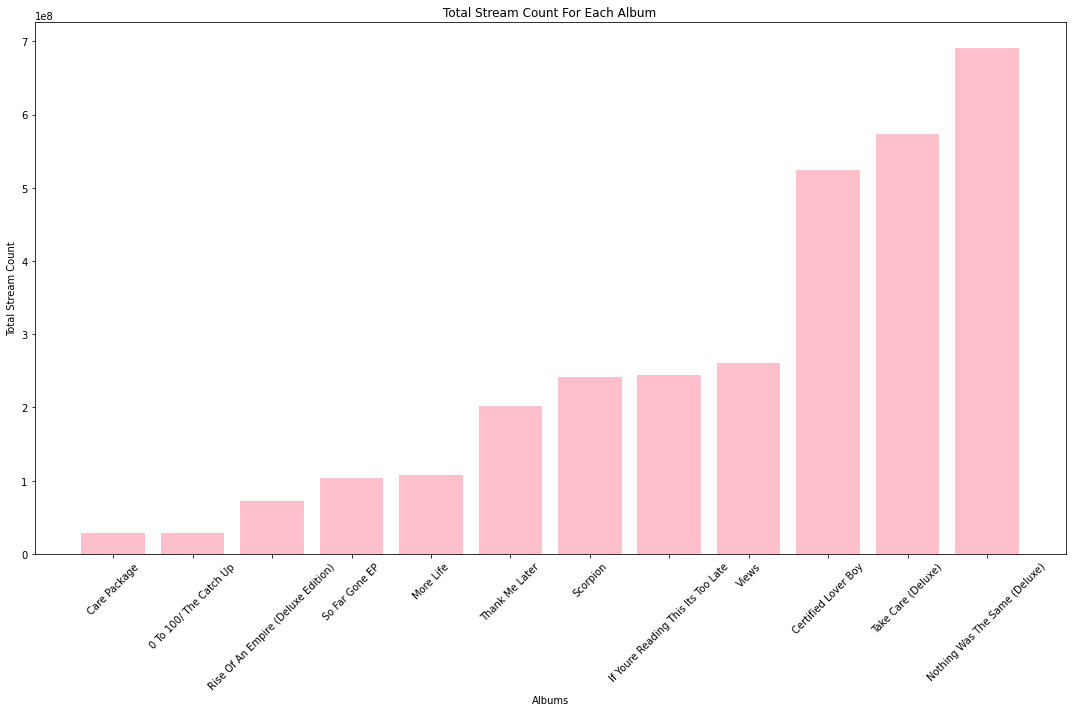

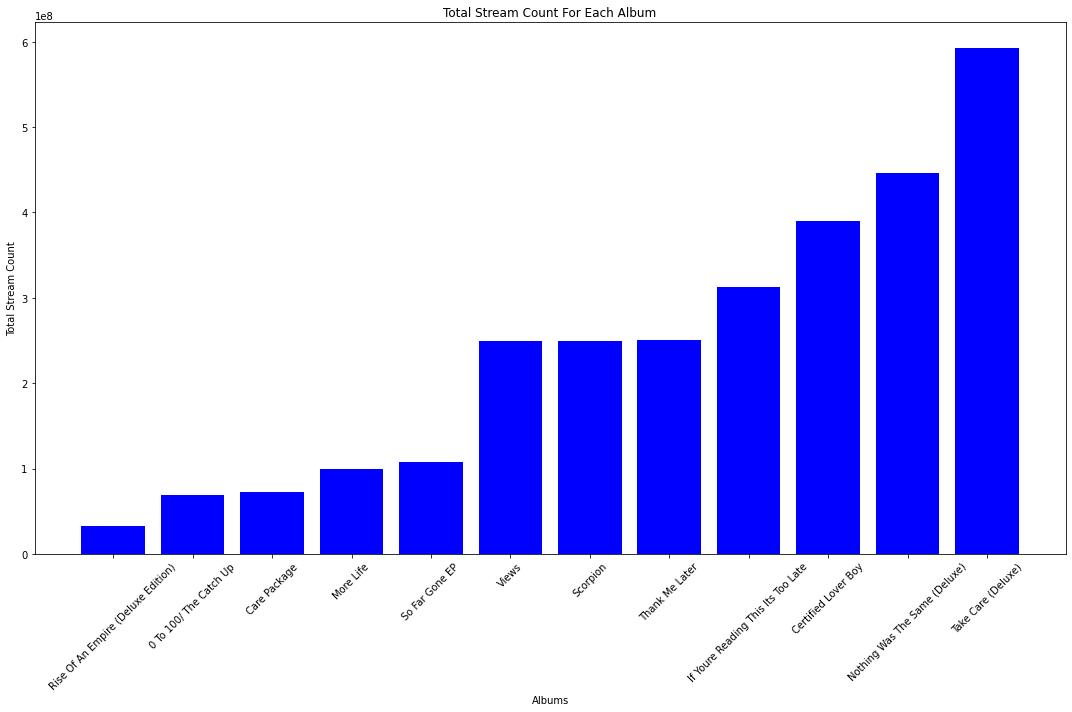

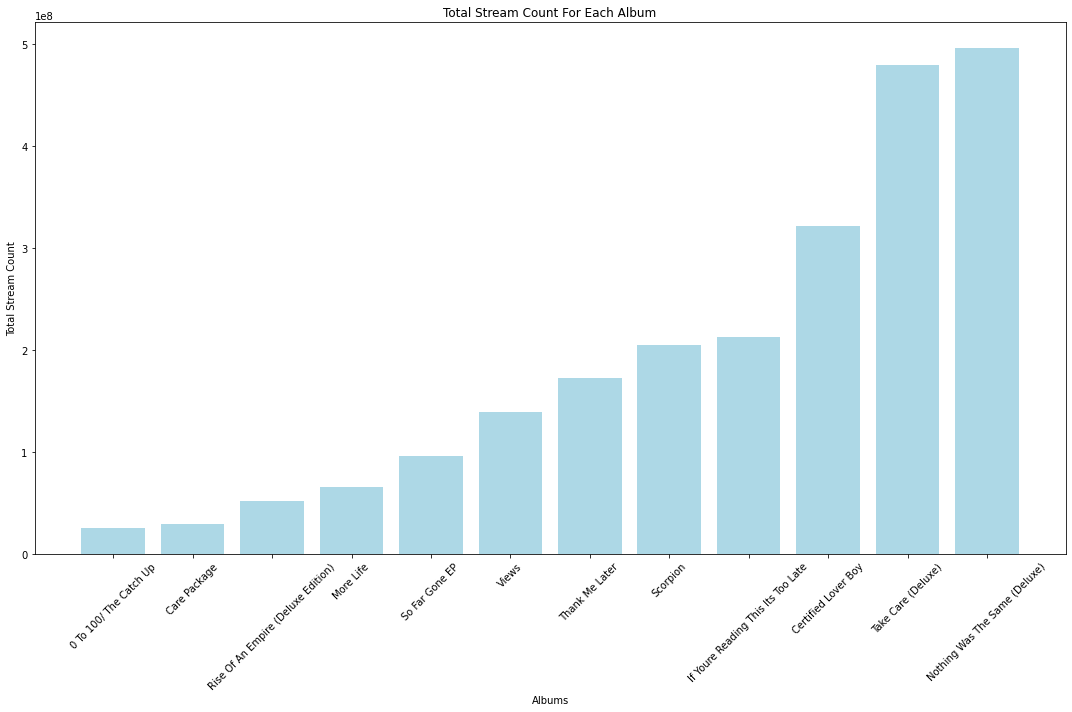

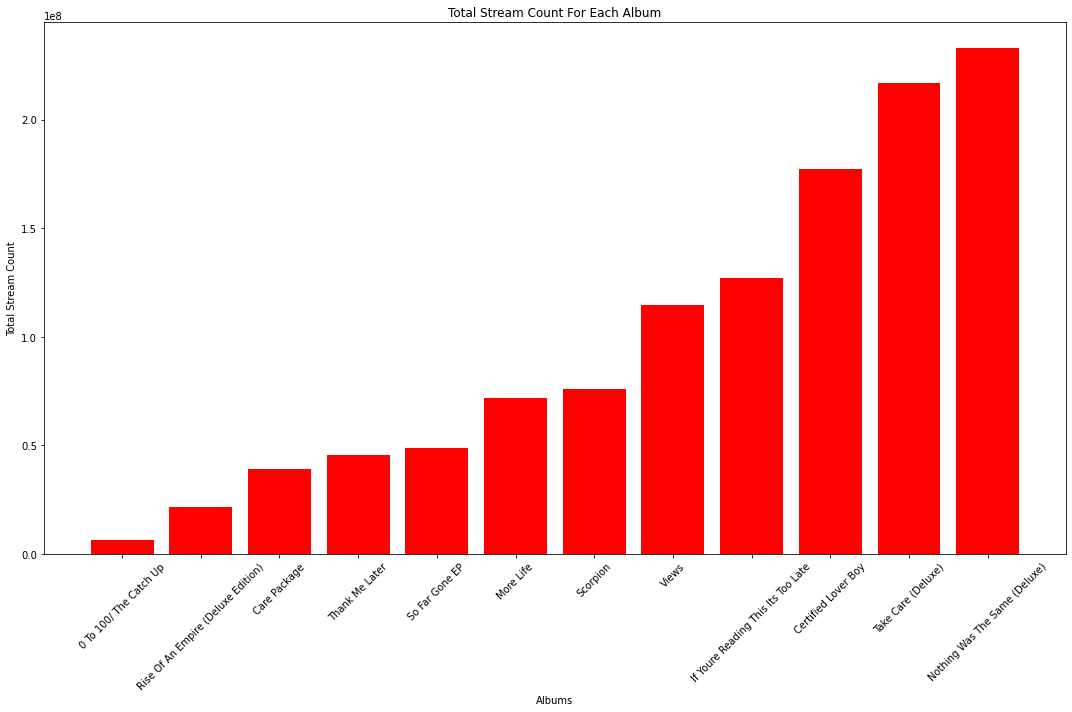

In [17]:
def bar_chart(x,y,c):
    # Put everything in a function so i dont
    # have to write it out again
    # Smarter not harder
    # Filter hit_list by albums and stream count 
    albums_by_streams = hit_list1[[x,y]]

    # Visuallize to see which albums are played the most

    # Group albums_by_streams by streaming options

    grouped = albums_by_streams.groupby(x)[y].sum().reset_index()

    # Create a bar chart
    grouped = grouped.sort_values(y)
    plt.figure(figsize=(15, 10))
    plt.bar(grouped[x], grouped[y], color = c)
    plt.xlabel(x)
    plt.ylabel('Total Stream Count')
    plt.title('Total Stream Count For Each Album')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # This code will create  a bar chart showing 

    # Total Play Count For Each Album

    # It looks like the results are

    # skewed towards the right

    # Big surprise..not really bc i made the code that way :/
    
spotify_streams = bar_chart('Albums','Spotify','green')
apple_streams = bar_chart('Albums','Apple-Music','pink')
tidal_streams = bar_chart('Albums','Tidal','blue')
amazon_streams = bar_chart('Albums','Amazon-Music','lightblue')
pandora_streams = bar_chart('Albums','Pandora','red')

In [18]:
def pie_chart(x,y):
    # Calculate the total playd for each album
    albums_by_streams = hit_list1[[x,y]]
    
    grouped = albums_by_streams.groupby(x)[y].sum().reset_index()
    
    total_streams = grouped[y].sum()

    # Calculate the percentage of total sales for each payment method
    grouped['Percentage'] = (grouped[y] / total_streams) * 100

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(grouped['Percentage'], labels=grouped[x], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Percentage of Total Streams by Album')
    plt.show()
    # This code will create a pie chart showing the percentage 
    # distribution of total plays among different album


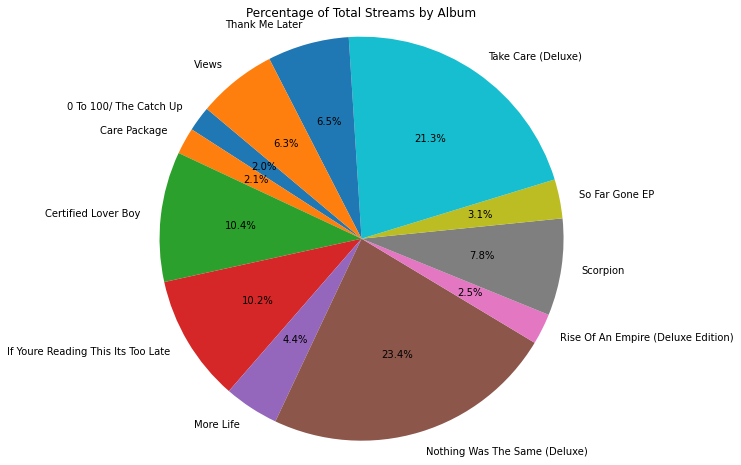

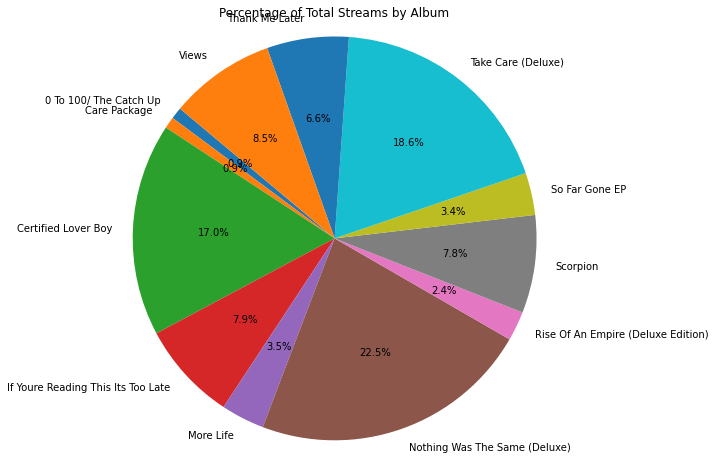

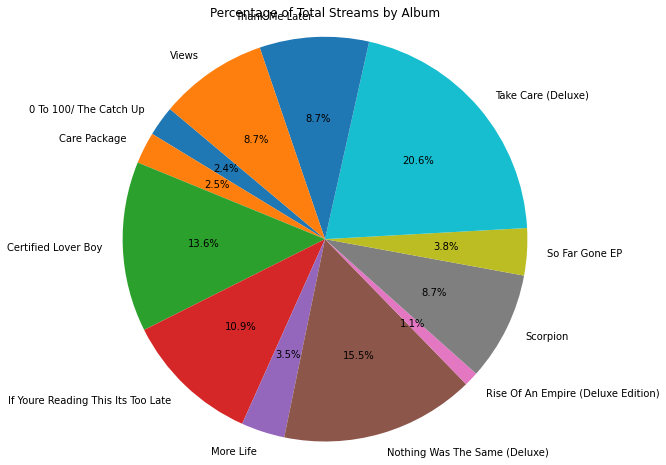

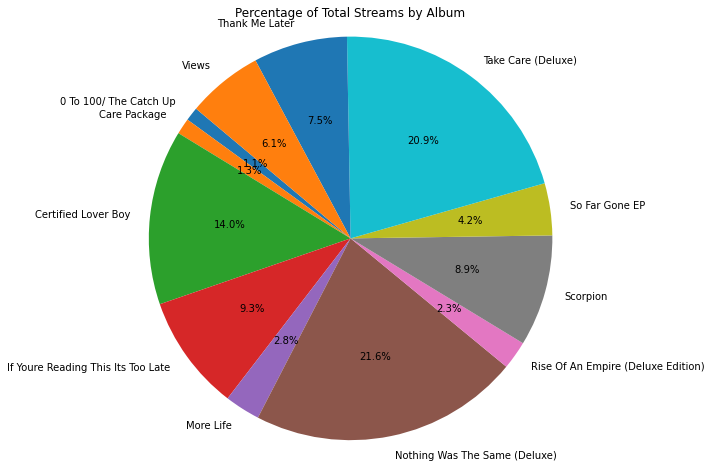

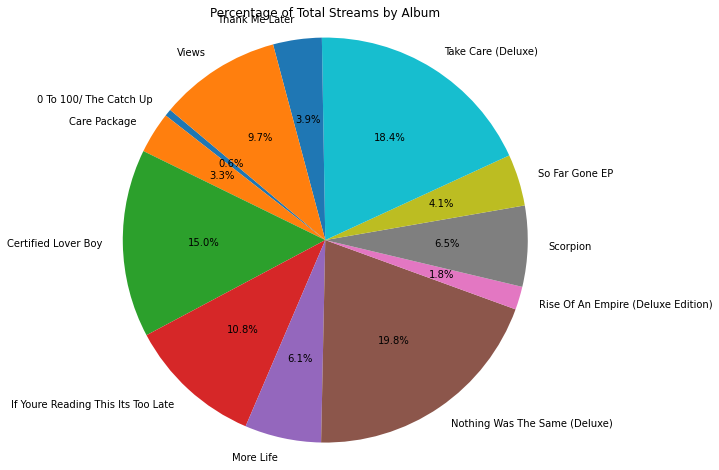

In [19]:
spotify_pie = pie_chart('Albums','Spotify')

apple_pie = pie_chart('Albums','Apple-Music')
tidal_pie = pie_chart('Albums','Tidal')
amazon_pie = pie_chart('Albums','Amazon-Music')
pandora_pie = pie_chart('Albums','Pandora')